In [243]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from keras.layers import Dropout
from keras.layers import Dense, Activation, Flatten,Reshape

In [244]:
df = pd.read_csv('binance-coin_2018-03-06_2023-03-05.csv')

In [245]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,Mar-03-2023,290.578300,291.656451,287.288000,289.933827,8.864673e+08,4.647844e+10
1,Mar-02-2023,300.322500,300.554300,288.026200,290.413337,1.312458e+09,4.651630e+10
2,Mar-01-2023,303.262000,304.045000,296.833200,300.226000,1.091921e+09,4.793647e+10
3,Feb-28-2023,301.874550,306.442800,301.284893,303.493500,1.081014e+09,4.855769e+10
4,Feb-27-2023,305.127542,305.913700,300.981365,302.036278,1.132201e+09,4.858260e+10
...,...,...,...,...,...,...,...
1820,Mar-09-2018,8.393523,8.394454,7.697779,7.741142,2.886964e+07,0.000000e+00
1821,Mar-08-2018,8.340532,8.374791,7.193116,8.374791,3.573931e+07,0.000000e+00
1822,Mar-07-2018,9.119737,9.195546,8.239773,8.371564,4.598669e+07,0.000000e+00
1823,Mar-06-2018,9.402097,10.195821,8.361776,9.101921,3.692032e+07,0.000000e+00


In [246]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,Mar-03-2023,289.933827
1,Mar-02-2023,290.413337
2,Mar-01-2023,300.226000
3,Feb-28-2023,303.493500
4,Feb-27-2023,302.036278


In [247]:
df.dtypes

Date      object
Close    float64
dtype: object

In [248]:
month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
              'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
              'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}


In [249]:
df = df.replace({'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
              'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
              'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}, regex = True)


In [250]:
df

,Date,Close
0,03-03-2023,289.933827
1,03-02-2023,290.413337
2,03-01-2023,300.226000
3,02-28-2023,303.493500
4,02-27-2023,302.036278
...,...,...
1820,03-09-2018,7.741142
1821,03-08-2018,8.374791
1822,03-07-2018,8.371564
1823,03-06-2018,9.101921


In [256]:
df['Date'] = pd.to_datetime(df['Date'])

Text(0, 0.5, 'Close Price (USD)')

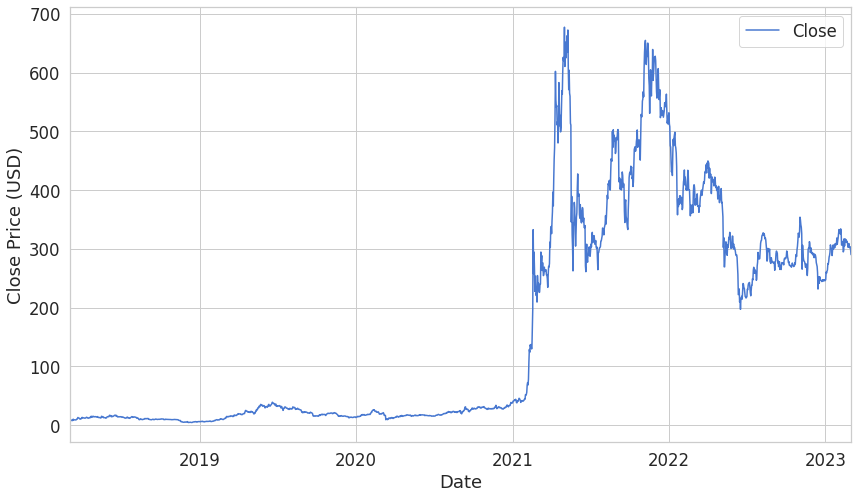

In [257]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

In [202]:
sc = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = sc.fit_transform(close_price)

In [127]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)



In [128]:
X_train.shape

(1638, 99, 1)

In [129]:
X_test.shape

(87, 99, 1)

In [147]:
bidirectional_layer = tf.keras.layers.Bidirectional

In [155]:
tf.keras.layers.Layer

keras.engine.base_layer.Layer

In [188]:

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
52/52 [==============================] - 24s 245ms/step - loss: 0.0177
Epoch 2/50
52/52 [==============================] - 14s 262ms/step - loss: 0.0054
Epoch 3/50
52/52 [==============================] - 13s 250ms/step - loss: 0.0052
Epoch 4/50
52/52 [==============================] - 13s 250ms/step - loss: 0.0037
Epoch 5/50
52/52 [==============================] - 13s 250ms/step - loss: 0.0042
Epoch 6/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0045
Epoch 7/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0038
Epoch 8/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0038
Epoch 9/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0034
Epoch 10/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0038
Epoch 11/50
52/52 [==============================] - 13s 250ms/step - loss: 0.0033
Epoch 12/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0034
Epoch 13/50
5

In [192]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 61ms/step - loss: 0.0328


0.032824065536260605

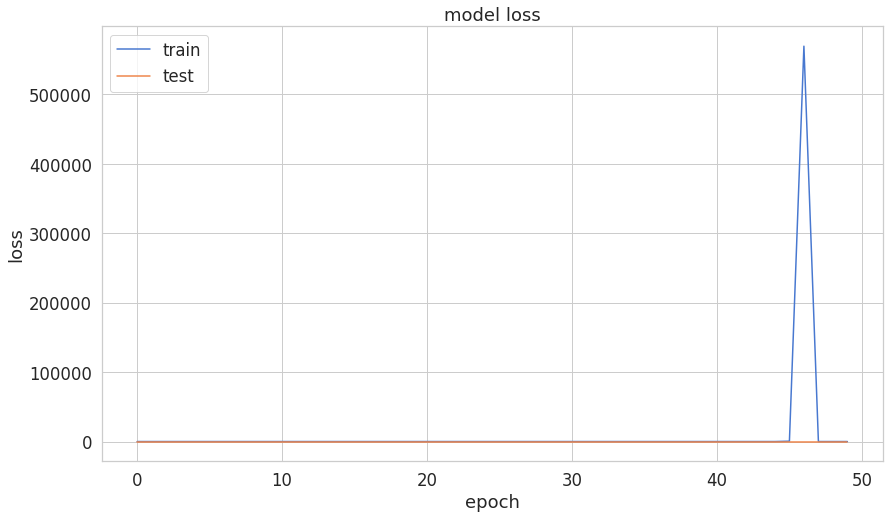

In [193]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [194]:
y_hat = model.predict(X_test)

3/3 [==============================] - 0s 61ms/step


In [240]:
dataset_test = pd.read_csv('binance-coin_2018-03-06_2023-03-05.csv')
real_price = dataset_test.loc[:,'Close'].values

In [254]:
dataset_total = pd.concat((dataset_test['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(99, 175):
    X_test.append(inputs[i-99:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

3/3 [==============================] - 0s 51ms/step


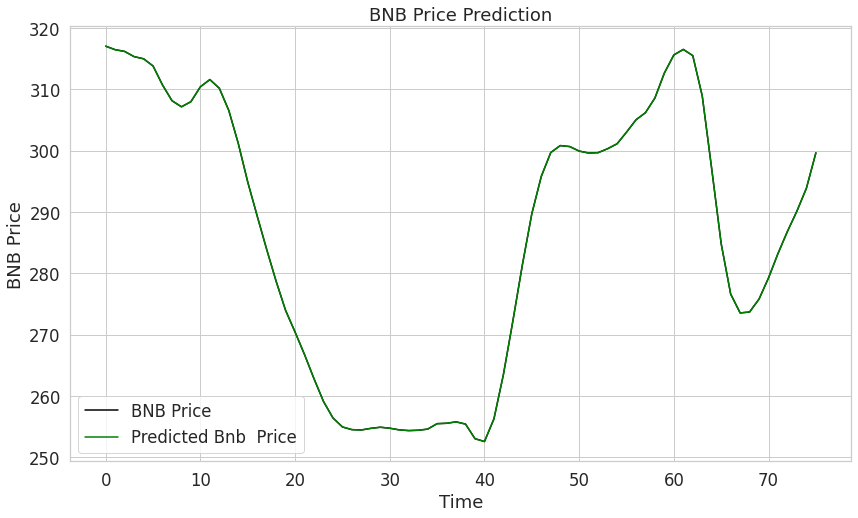

In [258]:
plt.plot(predicted_price, color = 'black', label = 'BNB Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Bnb  Price')
plt.title('BNB Price Prediction')
plt.xlabel('Time')
plt.ylabel('BNB Price')
plt.legend()
plt.show()

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")